CREDIT: Adapted from https://github.com/fastai/diffusion-nbs/blob/master/stable_diffusion.ipynb

# Stable Diffusion with 🤗 Diffusers


This notebook shows how to use Stable Diffusion. We use the 🤗 Hugging Face [🧨 Diffusers library](https://github.com/huggingface/diffusers).


In [ ]:
!pip install -Uq diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Using Stable Diffusion

To run Stable Diffusion, you have to accept the model license. It's an open CreativeML OpenRail-M license that claims no rights on the outputs you generate and prohibits you from deliberately producing illegal or harmful content. The [model card](https://huggingface.co/CompVis/stable-diffusion-v1-4) provides more details. If you do accept the license, you need to be a registered user in 🤗 Hugging Face Hub and get an access token from [here](https://huggingface.co/settings/tokens) for the code to work. You can provide your access token using the `notebook_login()` function.

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

### Stable Diffusion Pipeline

[`StableDiffusionPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion#diffusers.StableDiffusionPipeline) is an end-to-end [diffusion inference pipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion) that allows you to start generating images with just a few lines of code.

When we say "inference" we're referring to using an existing model to generate samples (in this case, images), as opposed to "training" (or fine-tuning) models using new data.

* We use [`from_pretrained`](https://huggingface.co/docs/diffusers/main/en/api/diffusion_pipeline#diffusers.DiffusionPipeline.from_pretrained) to create the pipeline and download the pretrained weights.
* The string passed to `from_pretrained` in this case (`CompVis/stable-diffusion-v1-4`) is the repo id of a pretrained pipeline hosted on [Hugging Face Hub](https://huggingface.co/models). This is exactly what we did in the "lightning tour" of HuggingFace for standard NLP tasks in Lecture 8.
* We indicate that we want to use the `fp16` (half-precision) version of the weights, and we tell `diffusers` to expect the weights in that format. This allows us to perform much faster inference with almost no discernible difference in quality.
* The weights for all the models in the pipeline will be downloaded and cached the first time you run this cell.

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               revision="fp16",
                                               torch_dtype=torch.float16).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


We are now ready to use the pipeline to start creating images.

In [ ]:
prompt = "a photograph of an astronaut riding a horse"

  0%|          | 0/50 [00:00<?, ?it/s]

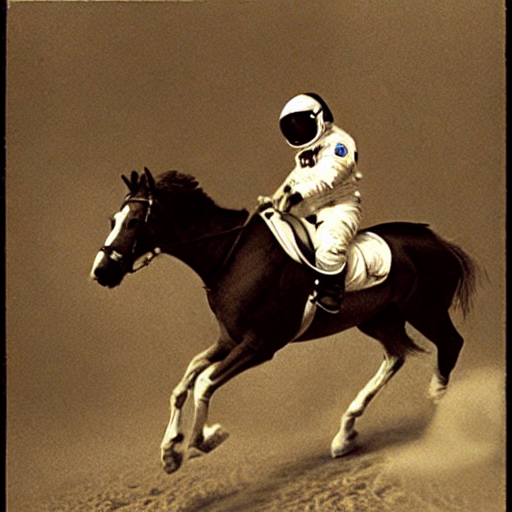

In [ ]:
torch.manual_seed(1) # set the seed for reproducibility
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

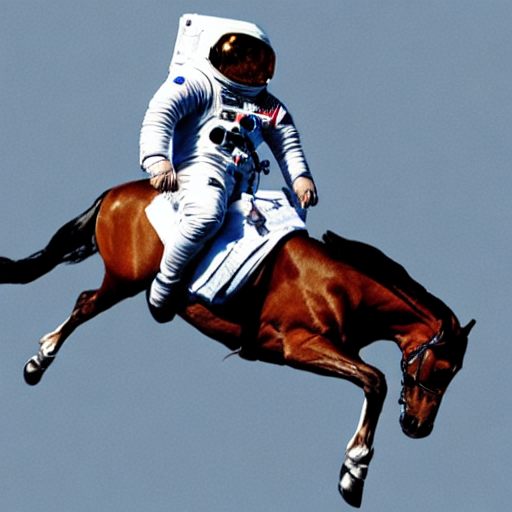

In [ ]:
torch.manual_seed(1024) # if we change the seed, we will get a different image for the same prompt
pipe(prompt).images[0]

You will have noticed that running the pipeline shows a progress bar with a certain number of steps. This is the gradual denoising approach we discussed in lecture.

Give me a prompt!

  0%|          | 0/50 [00:00<?, ?it/s]

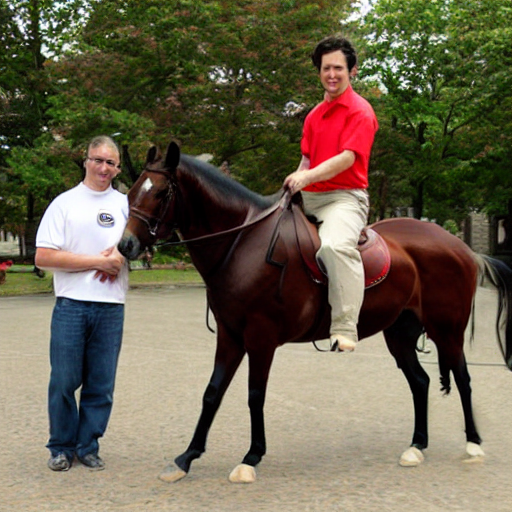

In [ ]:
torch.manual_seed(1) # set the seed for reproducibility
pipe("MIT professor riding a horse").images[0]

### Negative prompts

There are many extensions and variations on the basic pipeline we saw above. We will take a quick look at one of them: *Negative prompting*. Please see the source notebook (linked to at the top) for more.

_Negative prompting_ refers to the use of two prompts and "subtracting" one prompt from another.

Let's say the first prompt is "Labrador in the style of Vermeer".

  0%|          | 0/50 [00:00<?, ?it/s]

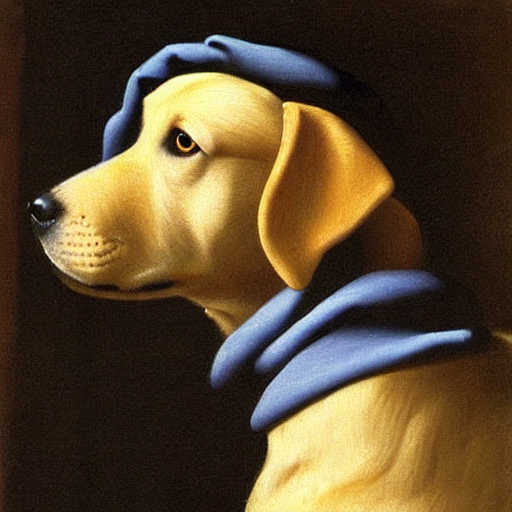

In [ ]:
torch.manual_seed(1000)
prompt = "Labrador in the style of Vermeer"
pipe(prompt).images[0]

We love the Labrador but don't care for the blue stuff.

To remove the blue stuff, we can just "subtract" the prompt "blue" from the prompt "Labrador in the style of Vermeer"(roughly speaking).

  0%|          | 0/50 [00:00<?, ?it/s]

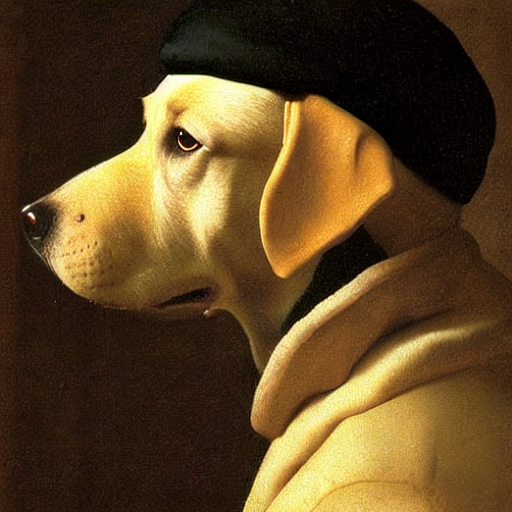

In [ ]:
torch.manual_seed(1000)
pipe(prompt, negative_prompt="blue").images[0]



---



To learn how to work with and customize diffusion models, see https://huggingface.co/docs/diffusers/en/tutorials/tutorial_overview.